<div style='background-color: #87ceeb;
    border: 0.5em solid black;
    border-radius: 0.5em;
    padding: 1em;'>
    <h2>Activité</h2>
    <h1>Occurrences d'un motif</h1>
</div>

**(1)** En s'inspirant de l'algorithme de Boyer-Moore-Horspool, définir une fonction `compte_bmh` qui prend en paramètres d'entrée deux chaînes de caractères `motif` et `chaine` et qui renvoie le nombre de fois où le `motif` apparaît dans la `chaine`.

In [7]:
def pretraitement(motif):
    dico = {}
    for k in range(len(motif)-1):
        dico[motif[k]] = len(motif) - 1 - k
    return dico

def correspond_renv(motif, chaine, k):
    n = len(motif)
    for i in range(n-1, -1, -1):
        if chaine[k+i] != motif[i]:
            return False
    return True

def compte_bmh(motif, chaine):
    c = len(chaine)
    m = len(motif)
    dico = pretraitement(motif)
    cpt = 0
    k = 0
    while k <= c - m:
        if correspond_renv(motif, chaine, k):
            cpt = cpt + 1
            k = k + 1
        if chaine[k+m-1] in dico:
            k = k + dico[chaine[k+m-1]]
        else:
            k = k + m
    return cpt

**(2)** Écrire des lignes de code permettant de compter le nombre de fois qu'apparaît le nom Thénardier dans le roman de Victor Hugo _Les Misérables_. Le roman est téléchargeable [ici](https://ntoulzac.github.io/Cours-NSI-Terminale/rech_textuelle/donnees/les_miserables.txt) sous forme de fichier texte.

In [9]:
motif = "Thénardier"
with open("les_miserables.txt", "r", encoding="utf-8") as fichier:
    texte = fichier.read()
print(compte_bmh(motif, texte))

593


**(3)** Définir une fonction `liste_bmh` qui prend en paramètres d'entrée deux chaînes de caractères `motif` et `chaine` et qui renvoie la liste des indices de la `chaine` où se trouve le `motif`.

In [10]:
def liste_bmh(motif, chaine):
    c = len(chaine)
    m = len(motif)
    dico = pretraitement(motif)
    L = []
    k = 0
    while k <= c - m:
        if correspond_renv(motif, chaine, k):
            L.append(k)
            k = k + 1
        if chaine[k+m-1] in dico:
            k = k + dico[chaine[k+m-1]]
        else:
            k = k + m
    return L

Les deux cellules ci-dessous permettent de représenter graphiquement les occurrences des noms de trois protagonistes du roman : Jean Valjean, Cosette et Marius.

In [12]:
listeV = liste_bmh("Valjean", texte)
listeC = liste_bmh("Cosette", texte)
listeM = liste_bmh("Marius", texte)

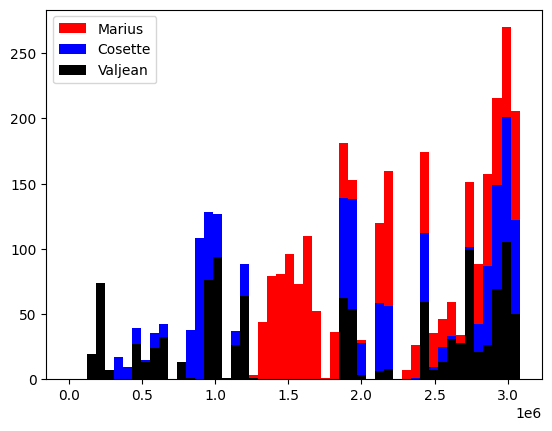

In [13]:
import matplotlib.pyplot as plt
plt.hist([listeV, listeC, listeM], histtype="stepfilled", stacked=True, bins=50, range=(0, len(texte)-1),
         color=["k", "b", "r"], label=["Valjean", "Cosette", "Marius"])
plt.legend(loc="upper left")
plt.show()